# Машинное обучение

### 0. Я собрал собственный датасет с сайта gipernn по продаже квартир, по которому в дальнейшем будет проводиться машинное обучения (датасет обновляется периодически, поэтому количество данных там не постоянны)

In [611]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import sqlite3                  # Общение с базой данных
import matplotlib.pyplot as plt # Научная графика
from matplotlib import ticker   # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import missingno as msno

### 1. Прочитаем данные из моей базы данных, сформированной в процессе парсинга

In [612]:
conn = sqlite3.connect("/Users/dima/Desktop/database_Apr_24_2024_tmp.db")
query = "SELECT * FROM kvartir"
data_raw = pd.read_sql_query(query, conn)
data_raw.replace({None: np.nan, '': np.nan}, inplace=True) # чтобы было по-другому
conn.close()

In [613]:
data_raw.shape

(4383, 53)

#### Удалим то, что точно не пригодится

In [614]:
data_raw.drop(['index', 'Ссылка', 'Заголовок', 'Сегмент', 'Подсегмент', 'Описание', 'Город',  
           'Адрес', 'Источник', 'Дата парсинга', 'Телефон', 'Торг уместен', 'Ипотека', '№', 
           'Школа по прописке', 'ДУК и ТСЖ'], axis=1, inplace=True)

### 2. Визуализируем данные и вычислим основные характеристики

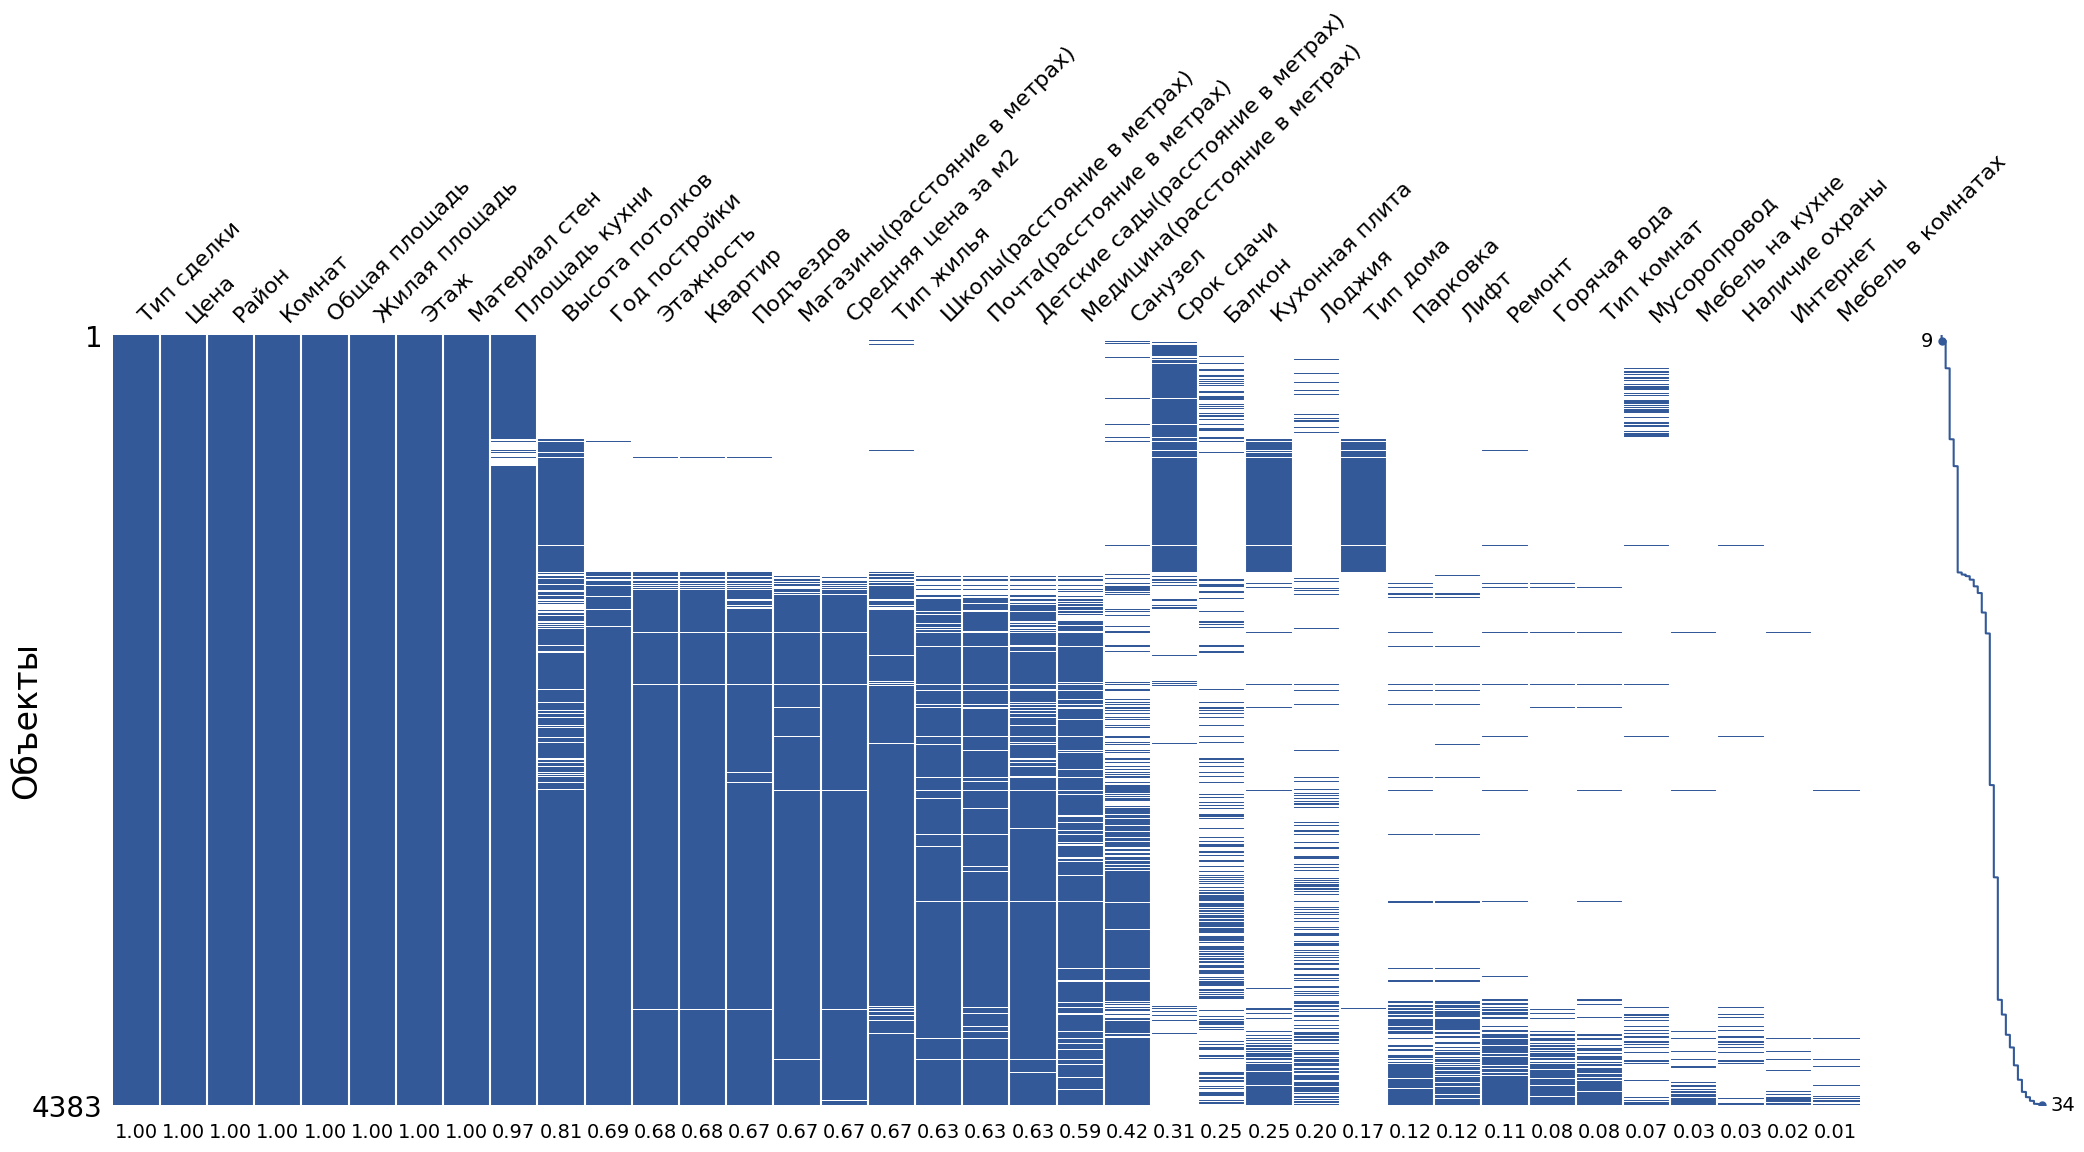

In [615]:
def missing_percentage(series):
    return f'{series.isnull().mean() * 100:.2f}%'

# Создание отсортированного списка столбцов по проценту пропущенных значений
sorted_columns = data_raw.isnull().mean().sort_values().index

# Отображение графика с сортированными столбцами
msno.matrix(
    data_raw[sorted_columns],  # Подаем данные с отсортированными столбцами
    sparkline=True,
    sort="ascending",
    color=(0.2, 0.35, 0.6)
)

# Добавление текста на график для каждого столбца с процентом заполненных значений
for i, column in enumerate(sorted_columns):
    percentage = missing_percentage(data_raw[column])
    plt.text(x=i, y=len(data_raw) + 100, 
             s=f'{((len(data_raw[column]) - data_raw[column].isnull().sum()) / len(data_raw[column])):.2f}', ha='center', va='top', fontsize=14)

# Настройка осей и отображение графика
plt.ylabel('Объекты', ha='center', va='center', fontsize=24)
plt.show()

In [616]:
data_raw.describe()

,Цена,Комнат,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Высота потолков,Мусоропровод,Этажность,Средняя цена за м2,Подъездов,Квартир,Наличие охраны,Мебель на кухне,Интернет,Мебель в комнатах
count,4.383000e+03,4383.000000,4383.000000,4383.000000,4254.000000,4383.000000,3529.000000,324.000000,2992.00000,2931.000000,2945.000000,2991.000000,115.000000,116.0,76.0,64.0
mean,9.191494e+06,1.932695,55.652916,30.499300,10.313108,6.260780,2.641187,0.114198,9.79111,137731.108154,3.788455,151.834504,0.147826,1.0,1.0,1.0
std,7.440285e+06,1.060595,27.072512,16.699359,6.439007,5.177518,0.165179,0.318543,5.82230,34564.416512,2.493824,116.584178,0.356481,0.0,0.0,0.0
min,9.990000e+05,0.000000,11.200000,6.000000,1.000000,1.000000,2.000000,0.000000,2.00000,63862.000000,1.000000,1.000000,0.000000,1.0,1.0,1.0
25%,5.000000e+06,1.000000,37.900000,17.500000,6.000000,2.000000,2.500000,0.000000,5.00000,113696.500000,2.000000,72.000000,0.000000,1.0,1.0,1.0
50%,7.100000e+06,2.000000,50.400000,28.000000,9.000000,5.000000,2.600000,0.000000,9.00000,127578.000000,3.000000,120.000000,0.000000,1.0,1.0,1.0
75%,1.090000e+07,3.000000,65.720000,38.900000,13.500000,9.000000,2.700000,0.000000,10.25000,157498.000000,5.000000,207.000000,0.000000,1.0,1.0,1.0
max,1.530000e+08,21.000000,300.000000,190.000000,65.000000,26.000000,4.000000,1.000000,27.00000,277163.000000,18.000000,740.000000,1.000000,1.0,1.0,1.0


### 3. Обработка пропущенных значений

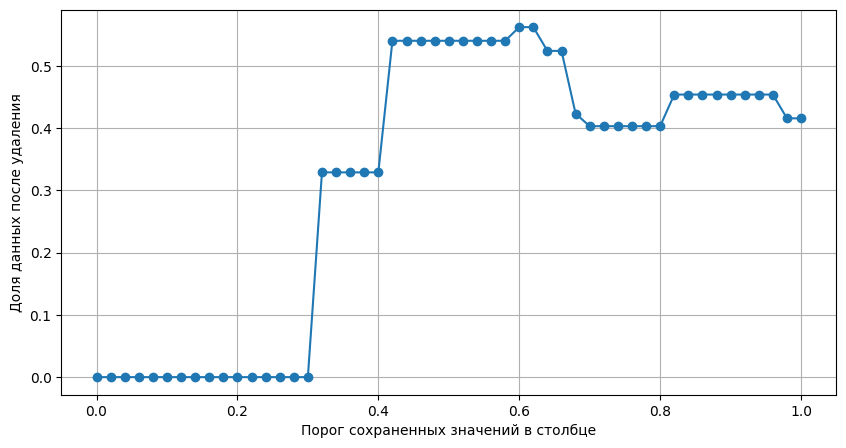

Получившийся порог: 0.6, Оставшиеся данные: 0.56


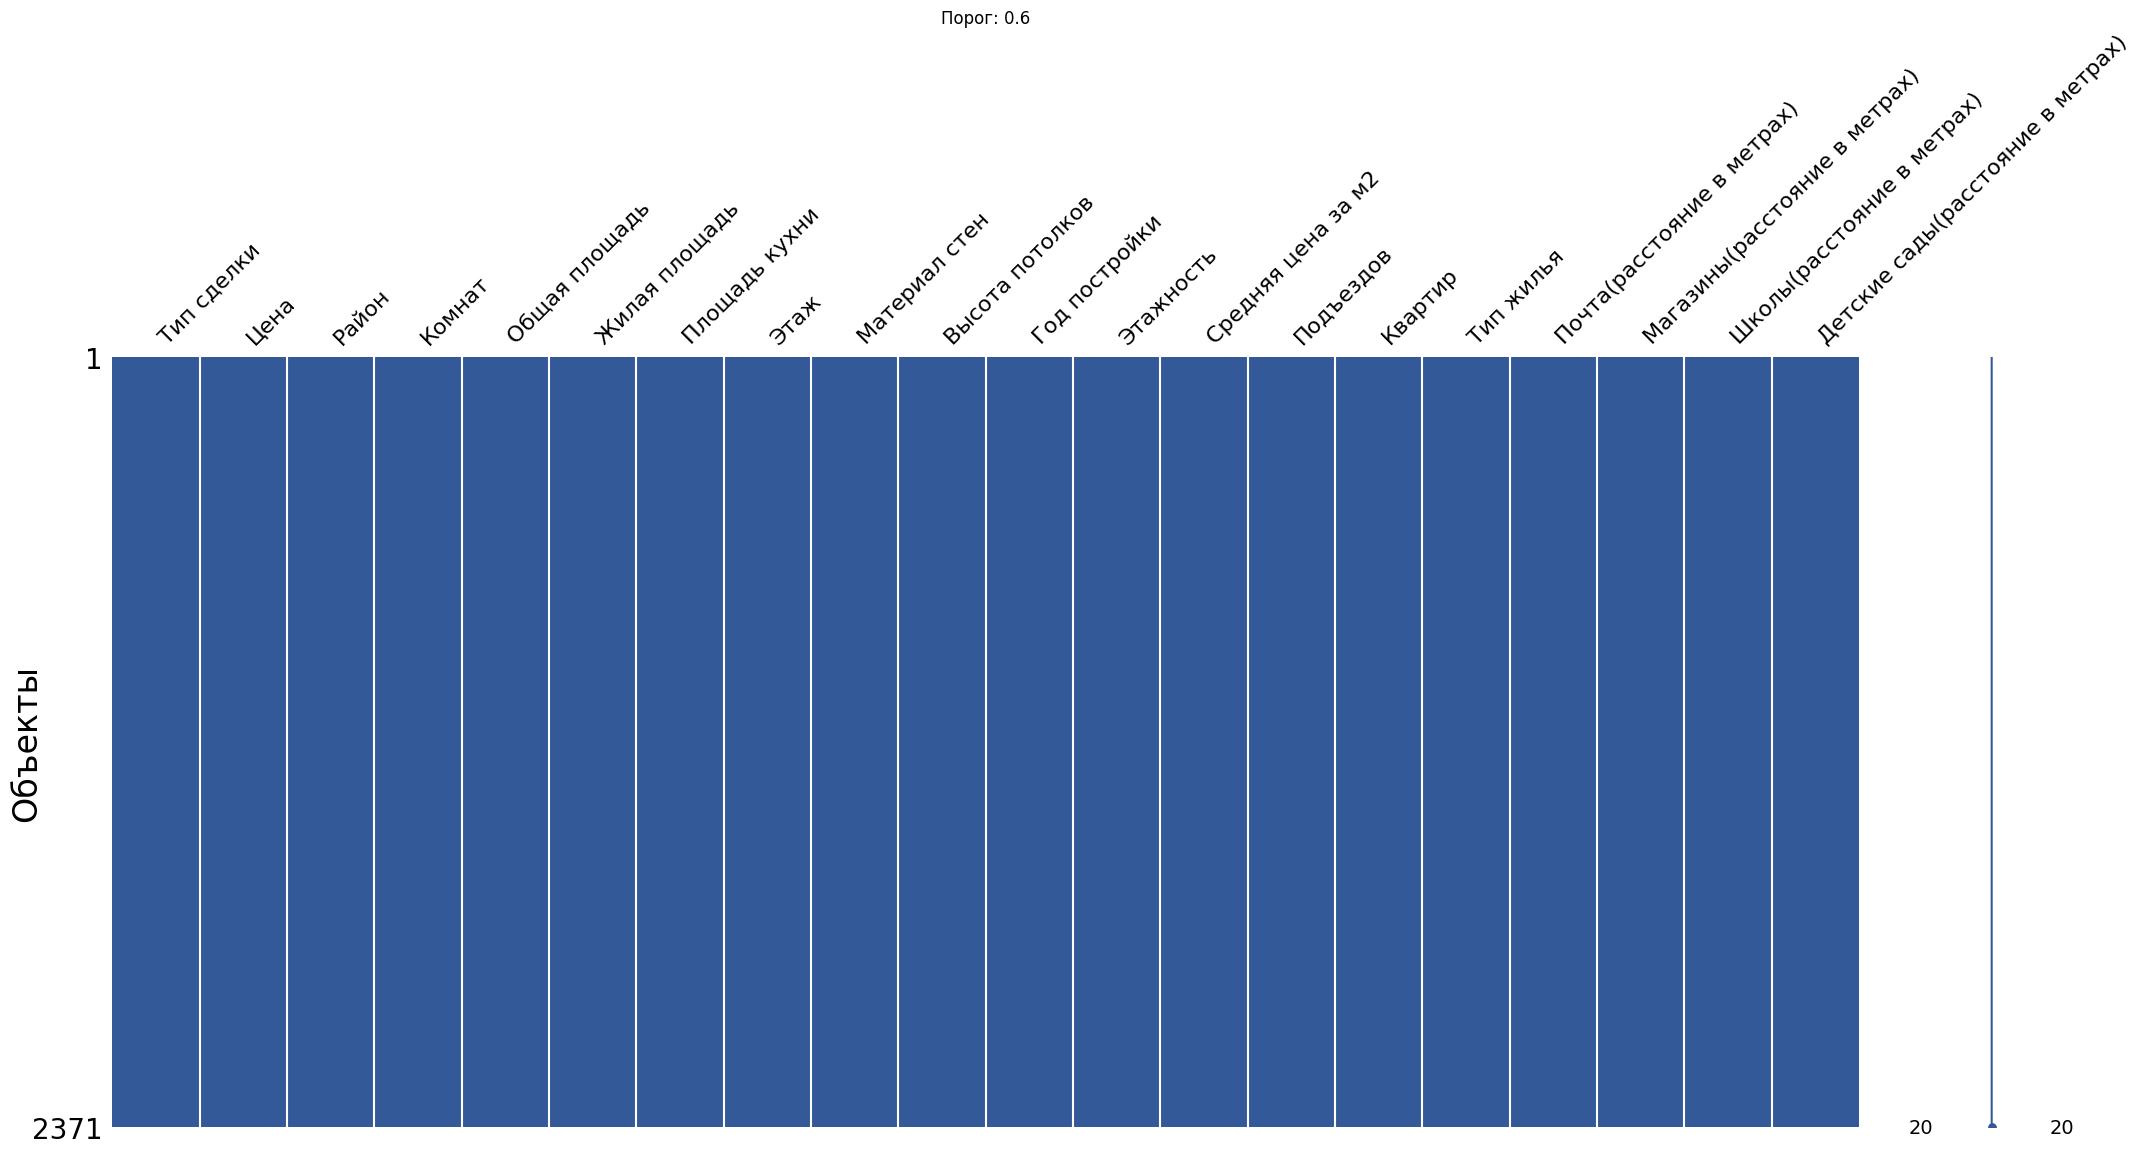

<class 'pandas.core.frame.DataFrame'>
Index: 2371 entries, 1 to 4381
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Тип сделки                         2371 non-null   object 
 1   Цена                               2371 non-null   int64  
 2   Район                              2371 non-null   object 
 3   Комнат                             2371 non-null   int64  
 4   Общая площадь                      2371 non-null   float64
 5   Жилая площадь                      2371 non-null   float64
 6   Площадь кухни                      2371 non-null   float64
 7   Этаж                               2371 non-null   int64  
 8   Материал стен                      2371 non-null   object 
 9   Высота потолков                    2371 non-null   float64
 10  Год постройки                      2371 non-null   object 
 11  Этажность                          2371 non-null   float64
 1

In [617]:
count_data = 0
for col in data_raw.columns:
    count_data += data_raw[col].shape[0] - data_raw[col].isnull().sum()
# print(f'Original amount not NaN fields: {count_data}')   

thresholds = [i/100 for i in range(0, 101, 2)]  # от 0 до 1 с шагом 0.02

saved_fields = []

# Перебираем пороги и вычисляем общие потери данных
for threshold in thresholds:
    threshold_value = len(data_raw) * threshold
    data_filtered = data_raw.dropna(axis='columns', thresh=threshold_value).copy()
    data_filtered.dropna(inplace=True)

    count_data_filtered = 0
    for col in data_filtered.columns:
        count_data_filtered += data_filtered[col].shape[0] - data_filtered[col].isnull().sum()
    # print(f'{threshold}: {data_filtered.shape[1]} призн., {count_data_filtered} не NaNов')

    saved_fields.append(count_data_filtered / count_data)
    
# Строим график
plt.figure(figsize=(10, 5))

plt.plot(thresholds, saved_fields, marker='o')
plt.xlabel('Порог сохраненных значений в столбце')
plt.ylabel('Доля данных после удаления')
plt.grid(True)
plt.show()

best_threshold = thresholds[saved_fields.index(max(saved_fields))]
# best_threshold = 1
data = data_raw.dropna(axis='columns', thresh=len(data_raw) * best_threshold).copy()
data.dropna(inplace=True)
print(f'Получившийся порог: {best_threshold}, Оставшиеся данные: {(data.shape[0] * data.shape[1] / count_data):.2f}')

msno.matrix(data, sort="ascending", 
            # color=(0.5, 0.65, 0.8)
            color=(0.2, 0.35, 0.6)
            )
plt.ylabel('Объекты', ha='center', va='center', fontsize=24)
plt.title(f'Порог: {best_threshold}')
plt.show()
data.info()

### 4. Обработка категориальных признаков

In [618]:
from sklearn.preprocessing import LabelEncoder
print(data['Материал стен'].value_counts(normalize=True) * 100)
mapping = {
    'монолитный железобетон': 'монолит'
}
data.replace('Материал стен', mapping, inplace=True)
materials = ["кирпич", "панель", "монолит", "блок", "дерево"]

def label_encode(materials, text):
    for material in materials:
        if material in text:
            return material
    return np.nan
data['Материал стен'] = data['Материал стен'].apply(lambda x: label_encode(materials, x))

digits_encoder = LabelEncoder()
data['Материал стен'] = digits_encoder.fit_transform(data['Материал стен'])
pd.DataFrame(list(digits_encoder.classes_), columns=['Материал стен'])

Материал стен
кирпич                    45.255167
панель                    37.579081
блок                      13.622944
шлакоблок                  2.572754
керамический блок          0.337410
монолитный железобетон     0.295234
кирпич, панель             0.168705
панель, кирпич             0.084353
дерево                     0.084353
Name: proportion, dtype: float64


,Материал стен
0,блок
1,дерево
2,кирпич
3,монолит
4,панель


In [619]:
district_encoder = LabelEncoder() # он хранит, как распределил data. Другой массив оцифрует так же, а не по порядку, как если бы был новый
data['Район'] = district_encoder.fit_transform(data['Район'])
pd.DataFrame(list(district_encoder.classes_), columns=['Район'])

,Район
0,Автозаводский
1,Канавинский
2,Ленинский
3,Московский
4,Нижегородский
5,Приокский
6,Советский
7,Сормовский


In [620]:
data['Год постройки'] = data['Год постройки'].astype(float)

In [621]:
data['Тип жилья'] = data['Тип жилья'].replace('другой', np.nan)
data.drop(columns={'Тип жилья'}, inplace=True)

In [622]:
data.replace('Магазины(расстояние в метрах)', {'в здании': 0}, inplace=True)
data['До магазина (в мин.)'] = data['Магазины(расстояние в метрах)'].astype(float) / (5 * 1000 / 60)
data.drop(columns=['Магазины(расстояние в метрах)'], axis=1, inplace=True)

data.replace('Почта(расстояние в метрах)', {'в здании': 0}, inplace=True)
data['До почты (в мин.)'] = data['Почта(расстояние в метрах)'].astype(float) / (5 * 1000 / 60)
data.drop(columns=['Почта(расстояние в метрах)'], axis=1, inplace=True)

data.replace('Школы(расстояние в метрах)', {'в здании': 0}, inplace=True)
data['До школы (в мин.)'] = data['Школы(расстояние в метрах)'].astype(float) / (5 * 1000 / 60)
data.drop(columns=['Школы(расстояние в метрах)'], axis=1, inplace=True)

data.replace('Детские сады(расстояние в метрах)', {'в здании': 0}, inplace=True)
data['До детсада (в мин.)'] = data['Детские сады(расстояние в метрах)'].astype(float) / (5 * 1000 / 60)
data.drop(columns=['Детские сады(расстояние в метрах)'], axis=1, inplace=True)

In [623]:
# data = data_raw[data_raw['Тип сделки'].apply(lambda x: x != 'Аренда')] # удалить строки, в которых точек больше 1
data.drop(['Тип сделки'], axis=1, inplace=True)

In [624]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2371 entries, 1 to 4381
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Цена                  2371 non-null   int64  
 1   Район                 2371 non-null   int64  
 2   Комнат                2371 non-null   int64  
 3   Общая площадь         2371 non-null   float64
 4   Жилая площадь         2371 non-null   float64
 5   Площадь кухни         2371 non-null   float64
 6   Этаж                  2371 non-null   int64  
 7   Материал стен         2371 non-null   int64  
 8   Высота потолков       2371 non-null   float64
 9   Год постройки         2371 non-null   float64
 10  Этажность             2371 non-null   float64
 11  Средняя цена за м2    2371 non-null   float64
 12  Подъездов             2371 non-null   float64
 13  Квартир               2371 non-null   float64
 14  До магазина (в мин.)  2371 non-null   float64
 15  До почты (в мин.)     2371

### 5. Проводим нормализацию

In [625]:
from sklearn.preprocessing import MinMaxScaler
X = data.drop(['Цена'], axis=1)
y = data['Цена']

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

### 6. Разбиваем данные на обучающуюся и тестовую выборки

In [626]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

### 7. Запустить регрессию ближайших соседей

In [627]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

model = KNeighborsRegressor(n_neighbors=9)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)

R2_table

,train,test
k Nearest Neighbours,0.688201,0.606576


### 8. Подбор оптимального значения количества ближайших соседей

100%|██████████| 15/15 [00:19<00:00,  1.33s/it]


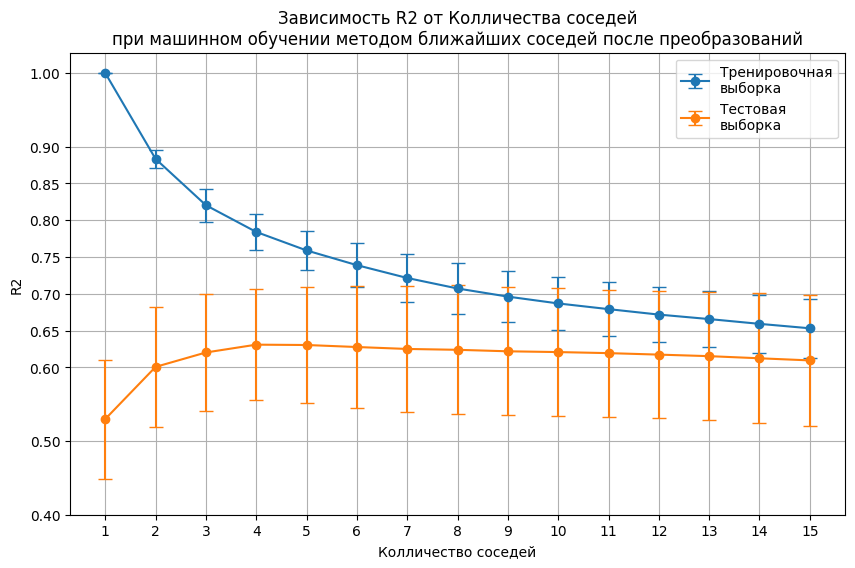

In [628]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

def median_absolute_percentage_error(y_true, y_pred):
    absolute_percentage_errors = np.abs((y_true - y_pred) / y_true)
    return np.median(absolute_percentage_errors) * 100

neiborses = [i for i in range(1, 16)]
R2_train = []
R2_test = []

R2_train_std = []
R2_test_std = []

for neibors in tqdm(neiborses):
    X = data.drop(['Цена'], axis=1)
    y = data['Цена']

    scaler = MinMaxScaler()
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)
    
    R2_train_list = []
    R2_test_list = []
    
    for rs in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)

        model = KNeighborsRegressor(n_neighbors=neibors)
        model.fit(X_train, y_train)

        y_train_predict = model.predict(X_train)
        y_test_predict = model.predict(X_test)

        R2_train_list.append(r2_score(y_train, y_train_predict))
        R2_test_list.append(r2_score(y_test,  y_test_predict))
    
    R2_train.append(np.mean(R2_train_list))
    R2_test.append(np.mean(R2_test_list))
    R2_train_std.append(np.std(R2_train_list))
    R2_test_std.append(np.std(R2_test_list))

# Строим график R2 с дисперсиями
plt.figure(figsize=(10, 6))
plt.errorbar(neiborses, R2_train, yerr=R2_train_std, label='Тренировочная\nвыборка', fmt='-o', capsize=5)
plt.errorbar(neiborses, R2_test, yerr=R2_test_std, label='Тестовая\nвыборка', fmt='-o', capsize=5)
plt.title(f'Зависимость R2 от Колличества соседей\nпри машинном обучении методом ближайших соседей после преобразований')
plt.xlabel('Колличество соседей')
plt.ylabel('R2')
plt.xticks(neiborses)
plt.yticks([0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 1])
plt.grid(True)
plt.legend()
plt.show()

В целом, 6 соседей — оптимально, чтобы были достаточно высокие результаты, а и в некоторых случаях не было недообучения и переобучения

### 9. Вычисляем ошибки на обучающей и тестовые выборках

In [629]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)

R2_table

,train,test
k Nearest Neighbours,0.73338,0.659882


### 10. Запуск линейной регрессии

Text(0.5, 1.0, 'Важность признаков')

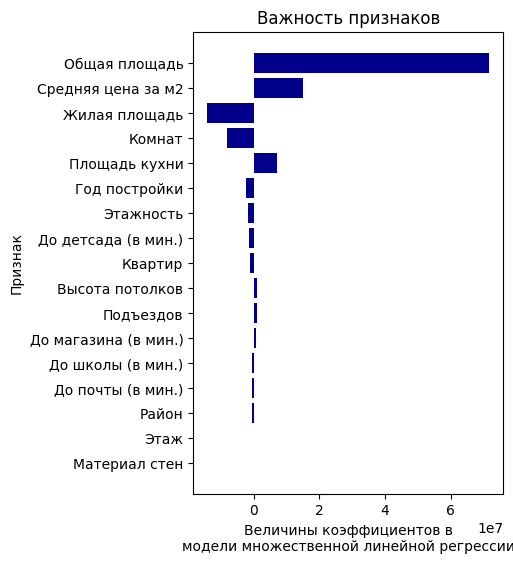

In [630]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# Коэффициенты признаков
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients})

# Создание объекта для построения графика
plt.figure(figsize=(4, 6))

sorted_feature_importance = feature_importance.iloc[(np.abs(feature_importance['Importance'].values)).argsort()]
# Построение графика
plt.barh(sorted_feature_importance['Feature'], sorted_feature_importance['Importance'], color='darkblue')

# Настройка осей и заголовка
plt.xlabel('Величины коэффициентов в\nмодели множественной линейной регрессии')
plt.ylabel('Признак')
plt.title('Важность признаков')

### 12. Исключение коррелирующих переменных

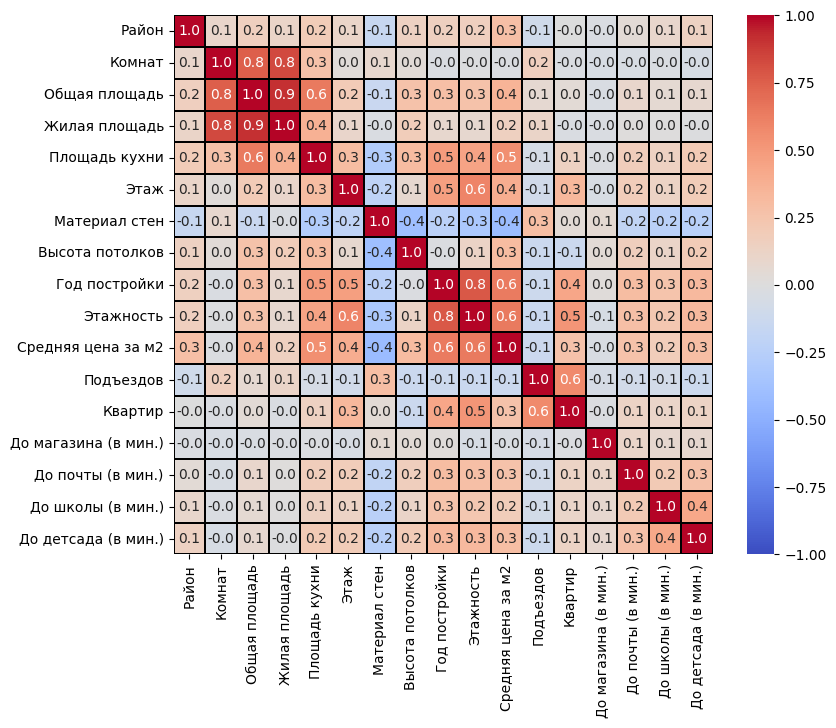

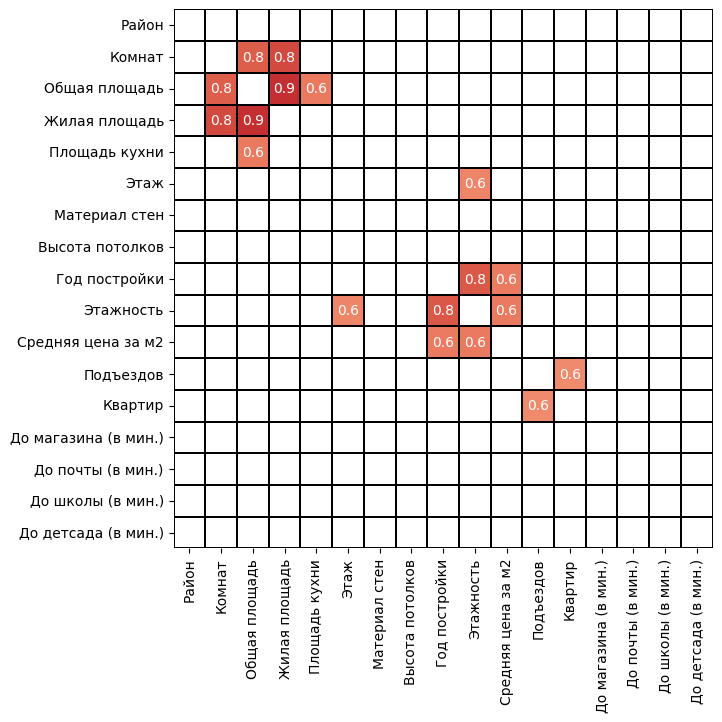

In [631]:
plt.figure(figsize=(9, 7))
corr_mat = X.corr(numeric_only=True)
sns.heatmap(corr_mat, square=True, annot=True, fmt='.1f', vmin=-1, vmax=1
             , cmap='coolwarm', linewidths=0.05, linecolor='black'
            )
plt.show()

plt.figure(figsize=(9, 7))
corr_mat = X.corr(numeric_only=True)

# Установка условий для аннотаций
mask = (np.abs(corr_mat) > 0.55) & (np.abs(corr_mat) < 1)

# Отображение тепловой карты с условиями для аннотаций и диапазоном значений для цветовой шкалы
sns.heatmap(corr_mat, square=True, annot=True, fmt='.1f', vmin=-1, vmax=1,
             cmap='coolwarm', linewidths=0.05, linecolor='black', cbar=False, center=0, mask=~mask)
plt.show()

In [632]:
X.drop(columns=['Комнат', 'Жилая площадь', 'Площадь кухни', 'Этажность', 'Этаж', 'Средняя цена за м2', 'Подъездов', 'До магазина (в мин.)', 'До почты (в мин.)', 'До школы (в мин.)', 'До детсада (в мин.)', 'Высота потолков'], inplace=True)

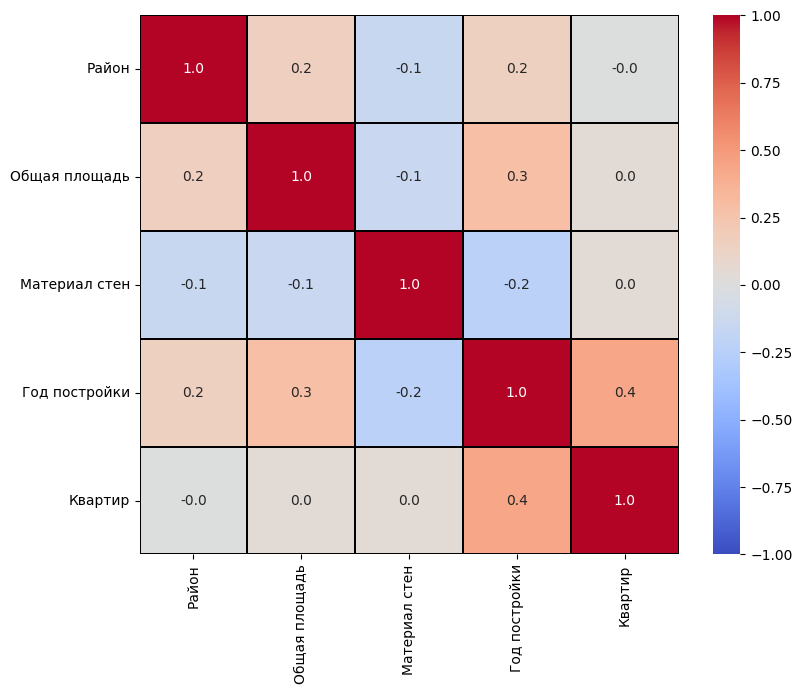

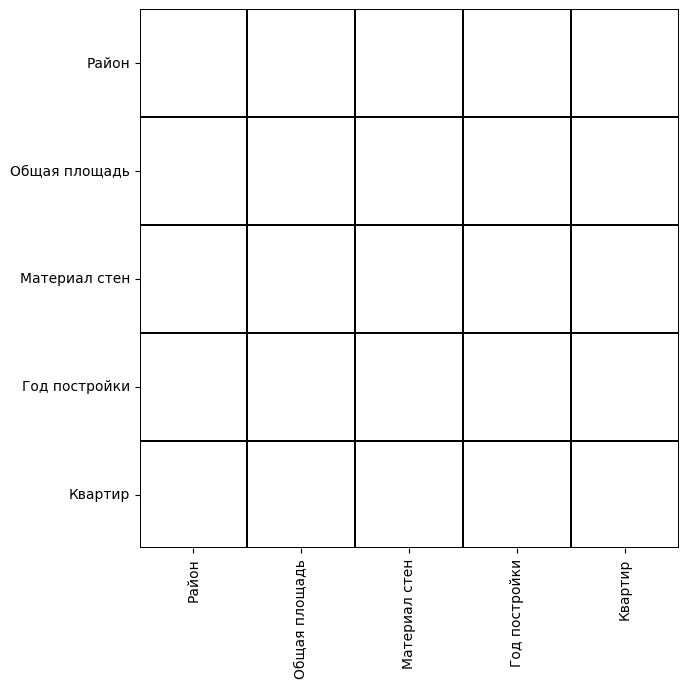

In [633]:
plt.figure(figsize=(9, 7))
corr_mat = X.corr(numeric_only=True)
sns.heatmap(corr_mat, square=True, annot=True, fmt='.1f', vmin=-1, vmax=1
             , cmap='coolwarm', linewidths=0.05, linecolor='black'
            )
plt.show()

plt.figure(figsize=(9, 7))
corr_mat = X.corr(numeric_only=True)

# Установка условий для аннотаций
mask = (np.abs(corr_mat) > 0.55) & (np.abs(corr_mat) < 1)

# Отображение тепловой карты с условиями для аннотаций и диапазоном значений для цветовой шкалы
sns.heatmap(corr_mat, square=True, annot=True, fmt='.1f', vmin=-1, vmax=1,
             cmap='coolwarm', linewidths=0.05, linecolor='black', cbar=False, center=0, mask=~mask)
plt.show()

In [634]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [635]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)

R2_table

,train,test
k Nearest Neighbours,0.741668,0.642233


Стало лучше после удаления коррелирующих признаков и некоторых других, несущих мало информации согласно модели линейной регрессии.